In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

## Intro

I had a situation where an image needed to be sliced into a specific number of tiles (rows and columns). This notebook has two functions to slice an image and stitch back the image from tiles.

## Read the image

In [2]:
img = cv2.imread('dog.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

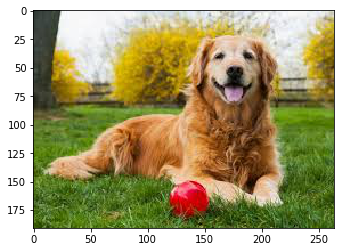

In [3]:
plt.imshow(img)

## Function to split the image.

### params: 
    num_rows : number of rows the image needs to sliced for
    num_cols : number of columns the image needs to sliced for
    return : a list of tiles, ordered from top left corner of the image
             and going horizontal first and then going row by row.

In [7]:
def split_image(image, num_rows, num_cols):
    h,w,d = image.shape
    tiles = []
    for row in range(0, num_rows):
        for col in range(0, num_cols):
            tile_y1 = int((row)*h*0.3)
            tile_y2 = int((row+1)*h*0.3)
            tile_x1 = int((col)*w*0.3)
            tile_x2 = int((col+1)*w*0.3)

            tiles.append(image[tile_y1:tile_y2, tile_x1:tile_x2])
    return tiles

## Testing the split function

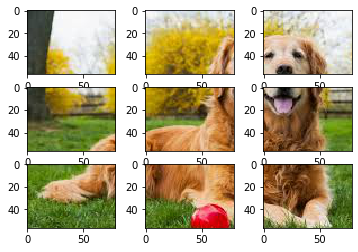

In [33]:
# split the image into 3 rows and 3 columns
tiles = split_image(img, 3, 3)

fig, axs = plt.subplots(3,3)
i = 0
for row in range(0, 3):
    for col in range(0, 3):
        axs[row, col].imshow(tiles[i])
        i += 1

## Function to join the tiles
### params:
    tiles : a list of tiles to join
    num_rows: number of rows to split the tiles list into, before stitching
    num_cols: number of columns to split the tiles list into, before stitching
    return: the stitched image

In [38]:
def join_tiles(tiles, num_rows, num_cols):
    num_rows = 3
    num_cols = 3
    row_images = []
    for row in range(0, num_rows*num_cols, 3):
        row_images.append(np.concatenate(tiles[row: row+num_cols],axis=1))

    image = np.concatenate(row_images, axis=0)
    return image



## Testing the join tiles function

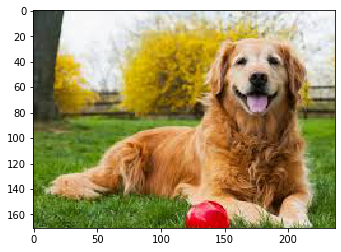

In [37]:
plt.imshow(join_tiles(tiles, 3,3))